# Using API to plot the most popular GitHub repos in Python.

In [1]:
import requests
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS

# Make an API call, and store the response.                                                                                                                                                                 
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
r = requests.get(url)
print("Status code:", r.status_code)

# Store API response in a variable.                                                                                                                                                                         
response_dict = r.json()
print("Total repositories:", response_dict['total_count'])

# Explore information about the repositories.                                                                                                                                                               
repo_dicts = response_dict['items']

names, plot_dicts = [], []
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])

    # Get the project description, if one is available.                                                                                                                                                     
    description = repo_dict['description']
    if not description:
        description = "No description provided."

    plot_dict = {
        'value': repo_dict['stargazers_count'],
        'label': description,
        'xlink': repo_dict['html_url'],
        }
    plot_dicts.append(plot_dict)

# Make visualization.                                                                                                                                                                                       
my_style = LS('#333366', base_style=LCS)
my_style.title_font_size = 24
my_style.label_font_size = 14
my_style.major_label_font_size = 18

my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.truncate_label = 15
my_config.show_y_guides = False
my_config.width = 1000

chart = pygal.Bar(my_config, style=my_style)
chart.title = 'Most-Starred Python Projects on GitHub'
chart.x_labels = names

chart.add('', plot_dicts)
chart.render_to_file('python_repos.svg')

ModuleNotFoundError: No module named 'pygal'

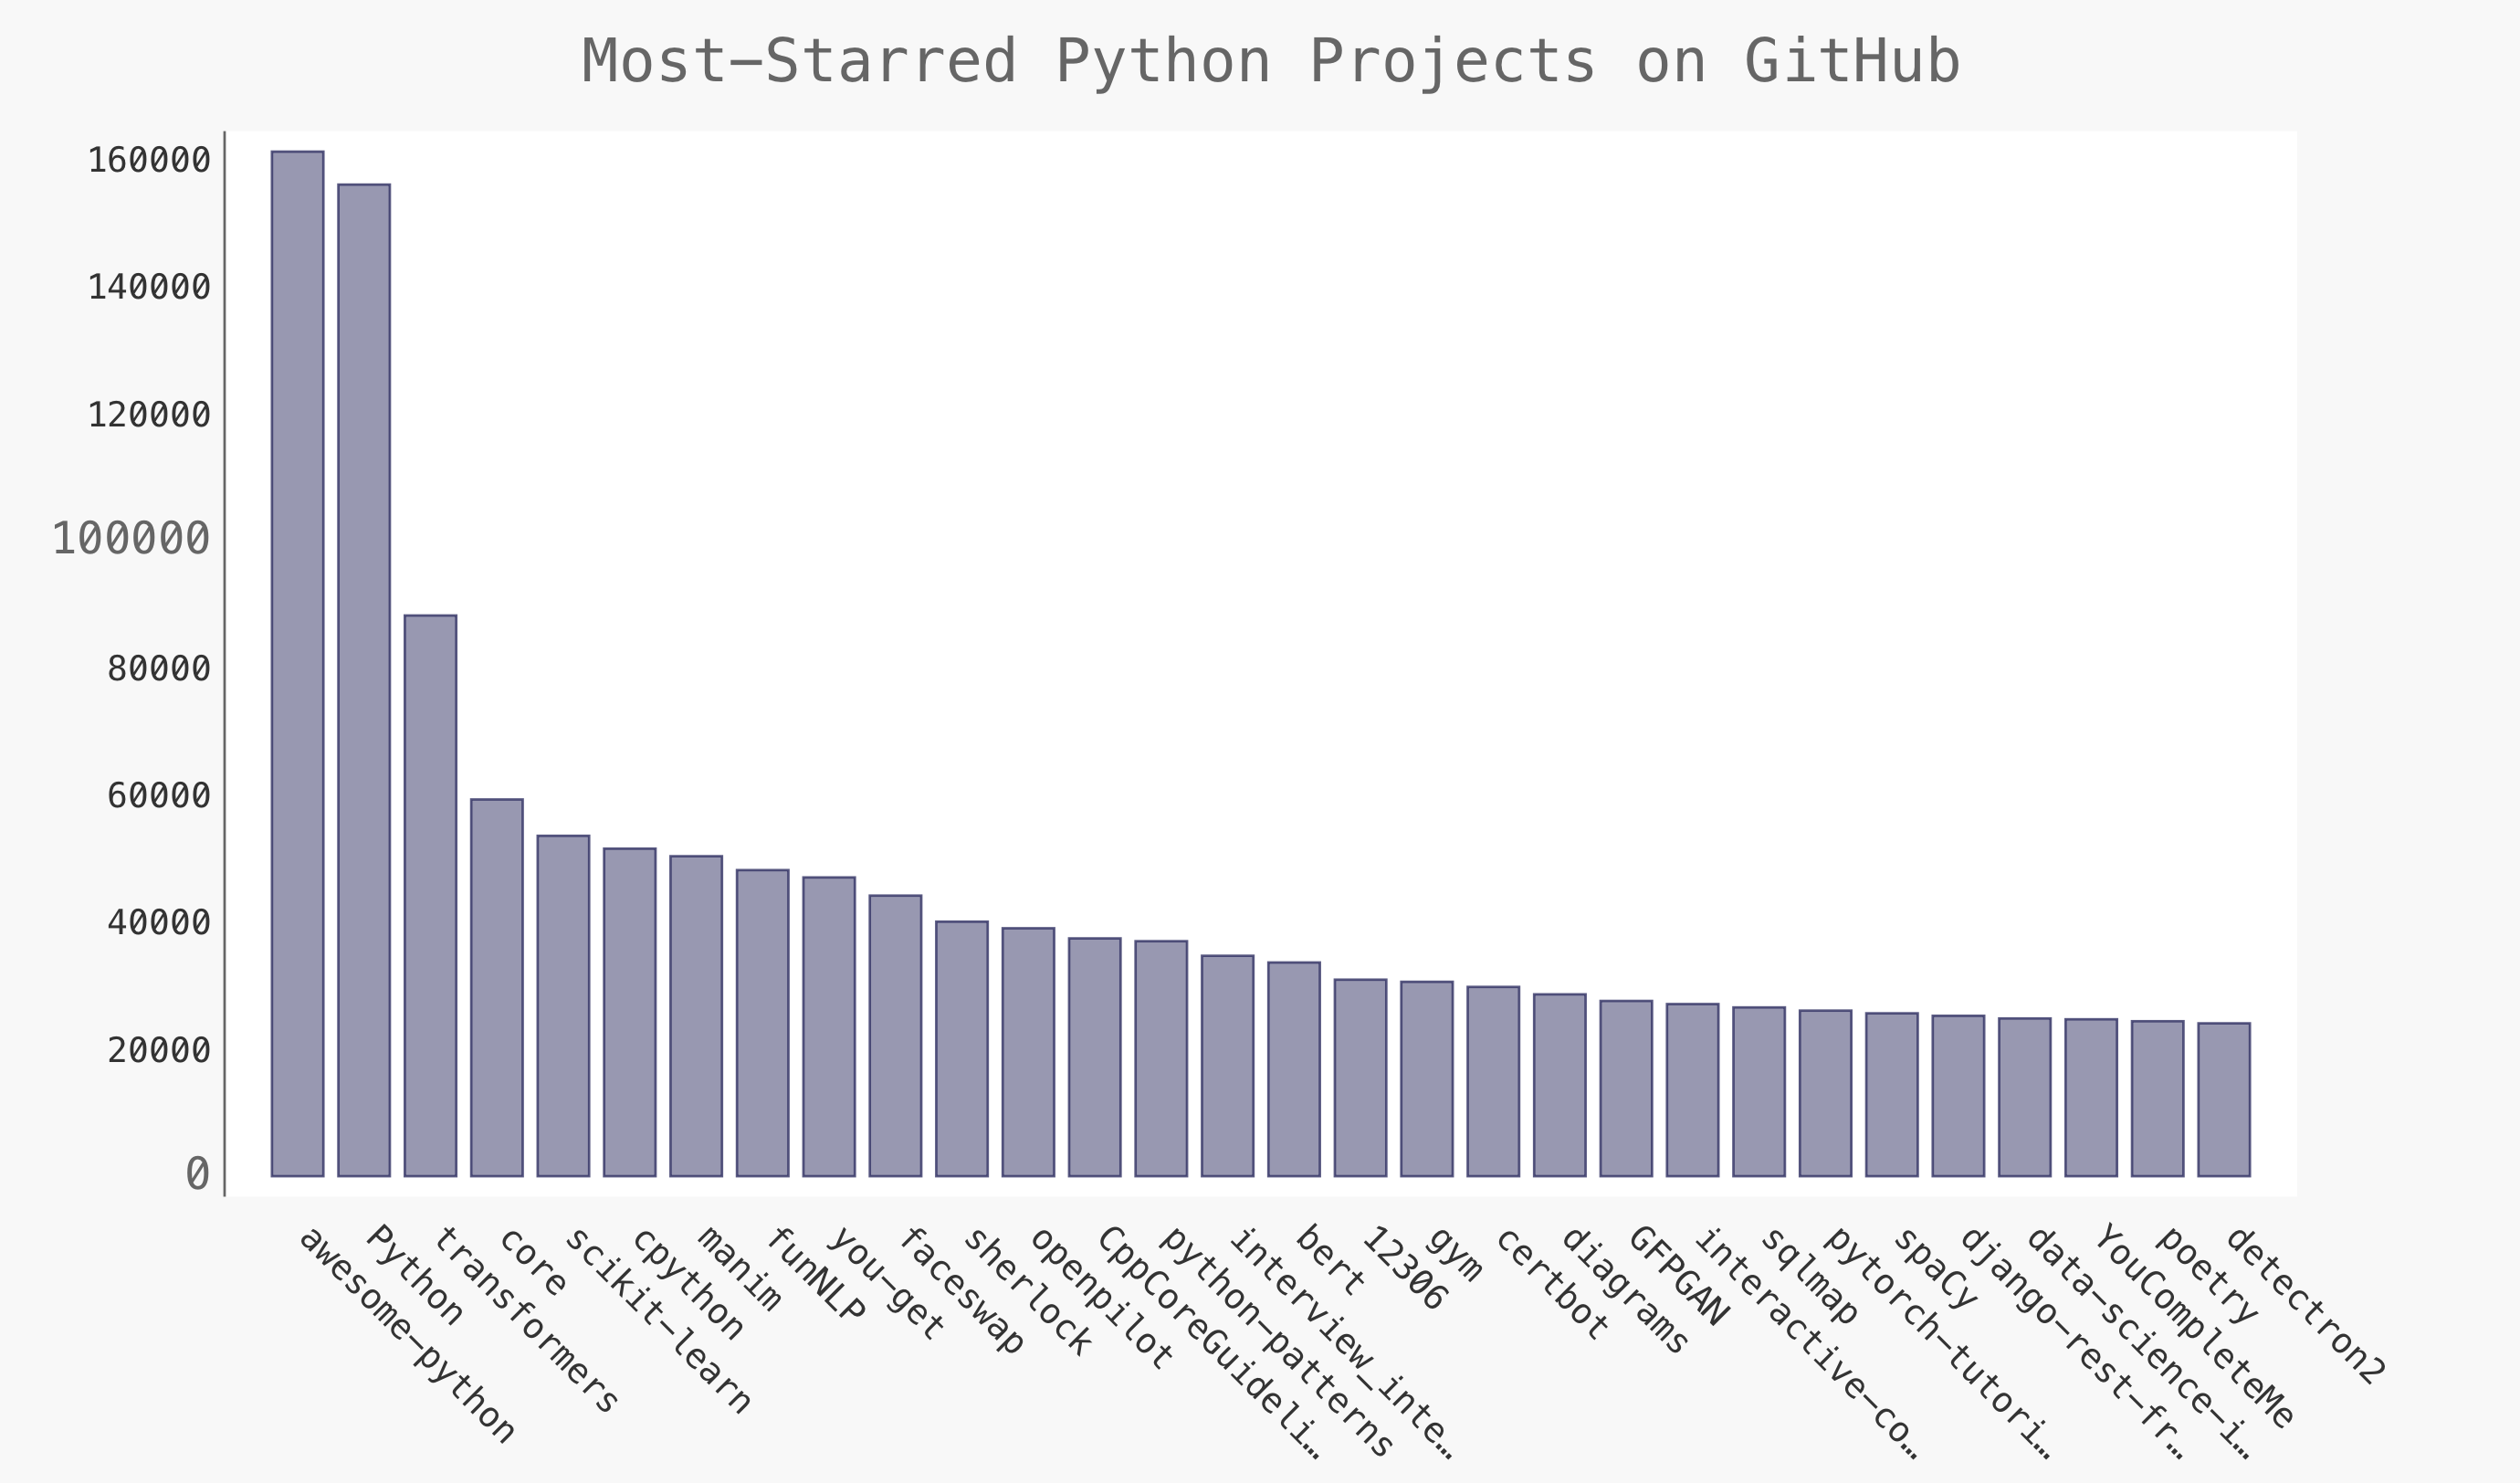

# Using API to plot the most popular GitHub repos in C.

In [ ]:
import requests
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS

# Make an API call, and store the response.                                                                                                                                                                 
url = 'https://api.github.com/search/repositories?q=language:C&sort=stars'
r = requests.get(url)
print("Status code:", r.status_code)

# Store API response in a variable.                                                                                                                                                                         
response_dict = r.json()
print("Total repositories:", response_dict['total_count'])

# Explore information about the repositories.                                                                                                                                                               
repo_dicts = response_dict['items']

names, plot_dicts = [], []
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])

    # Get the project description, if one is available.                                                                                                                                                     
    description = repo_dict['description']
    if not description:
        description = "No description provided."

    plot_dict = {
        'value': repo_dict['stargazers_count'],
        'label': description,
        'xlink': repo_dict['html_url'],
        }
    plot_dicts.append(plot_dict)

# Make visualization.                                                                                                                                                                                       
my_style = LS('#333366', base_style=LCS)
my_style.title_font_size = 24
my_style.label_font_size = 14
my_style.major_label_font_size = 18

my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.truncate_label = 15
my_config.show_y_guides = False
my_config.width = 1000

chart = pygal.Bar(my_config, style=my_style)
chart.title = 'Most-Starred Python Projects on GitHub'
chart.x_labels = names

chart.add('', plot_dicts)
chart.render_to_file('C_repos.svg')

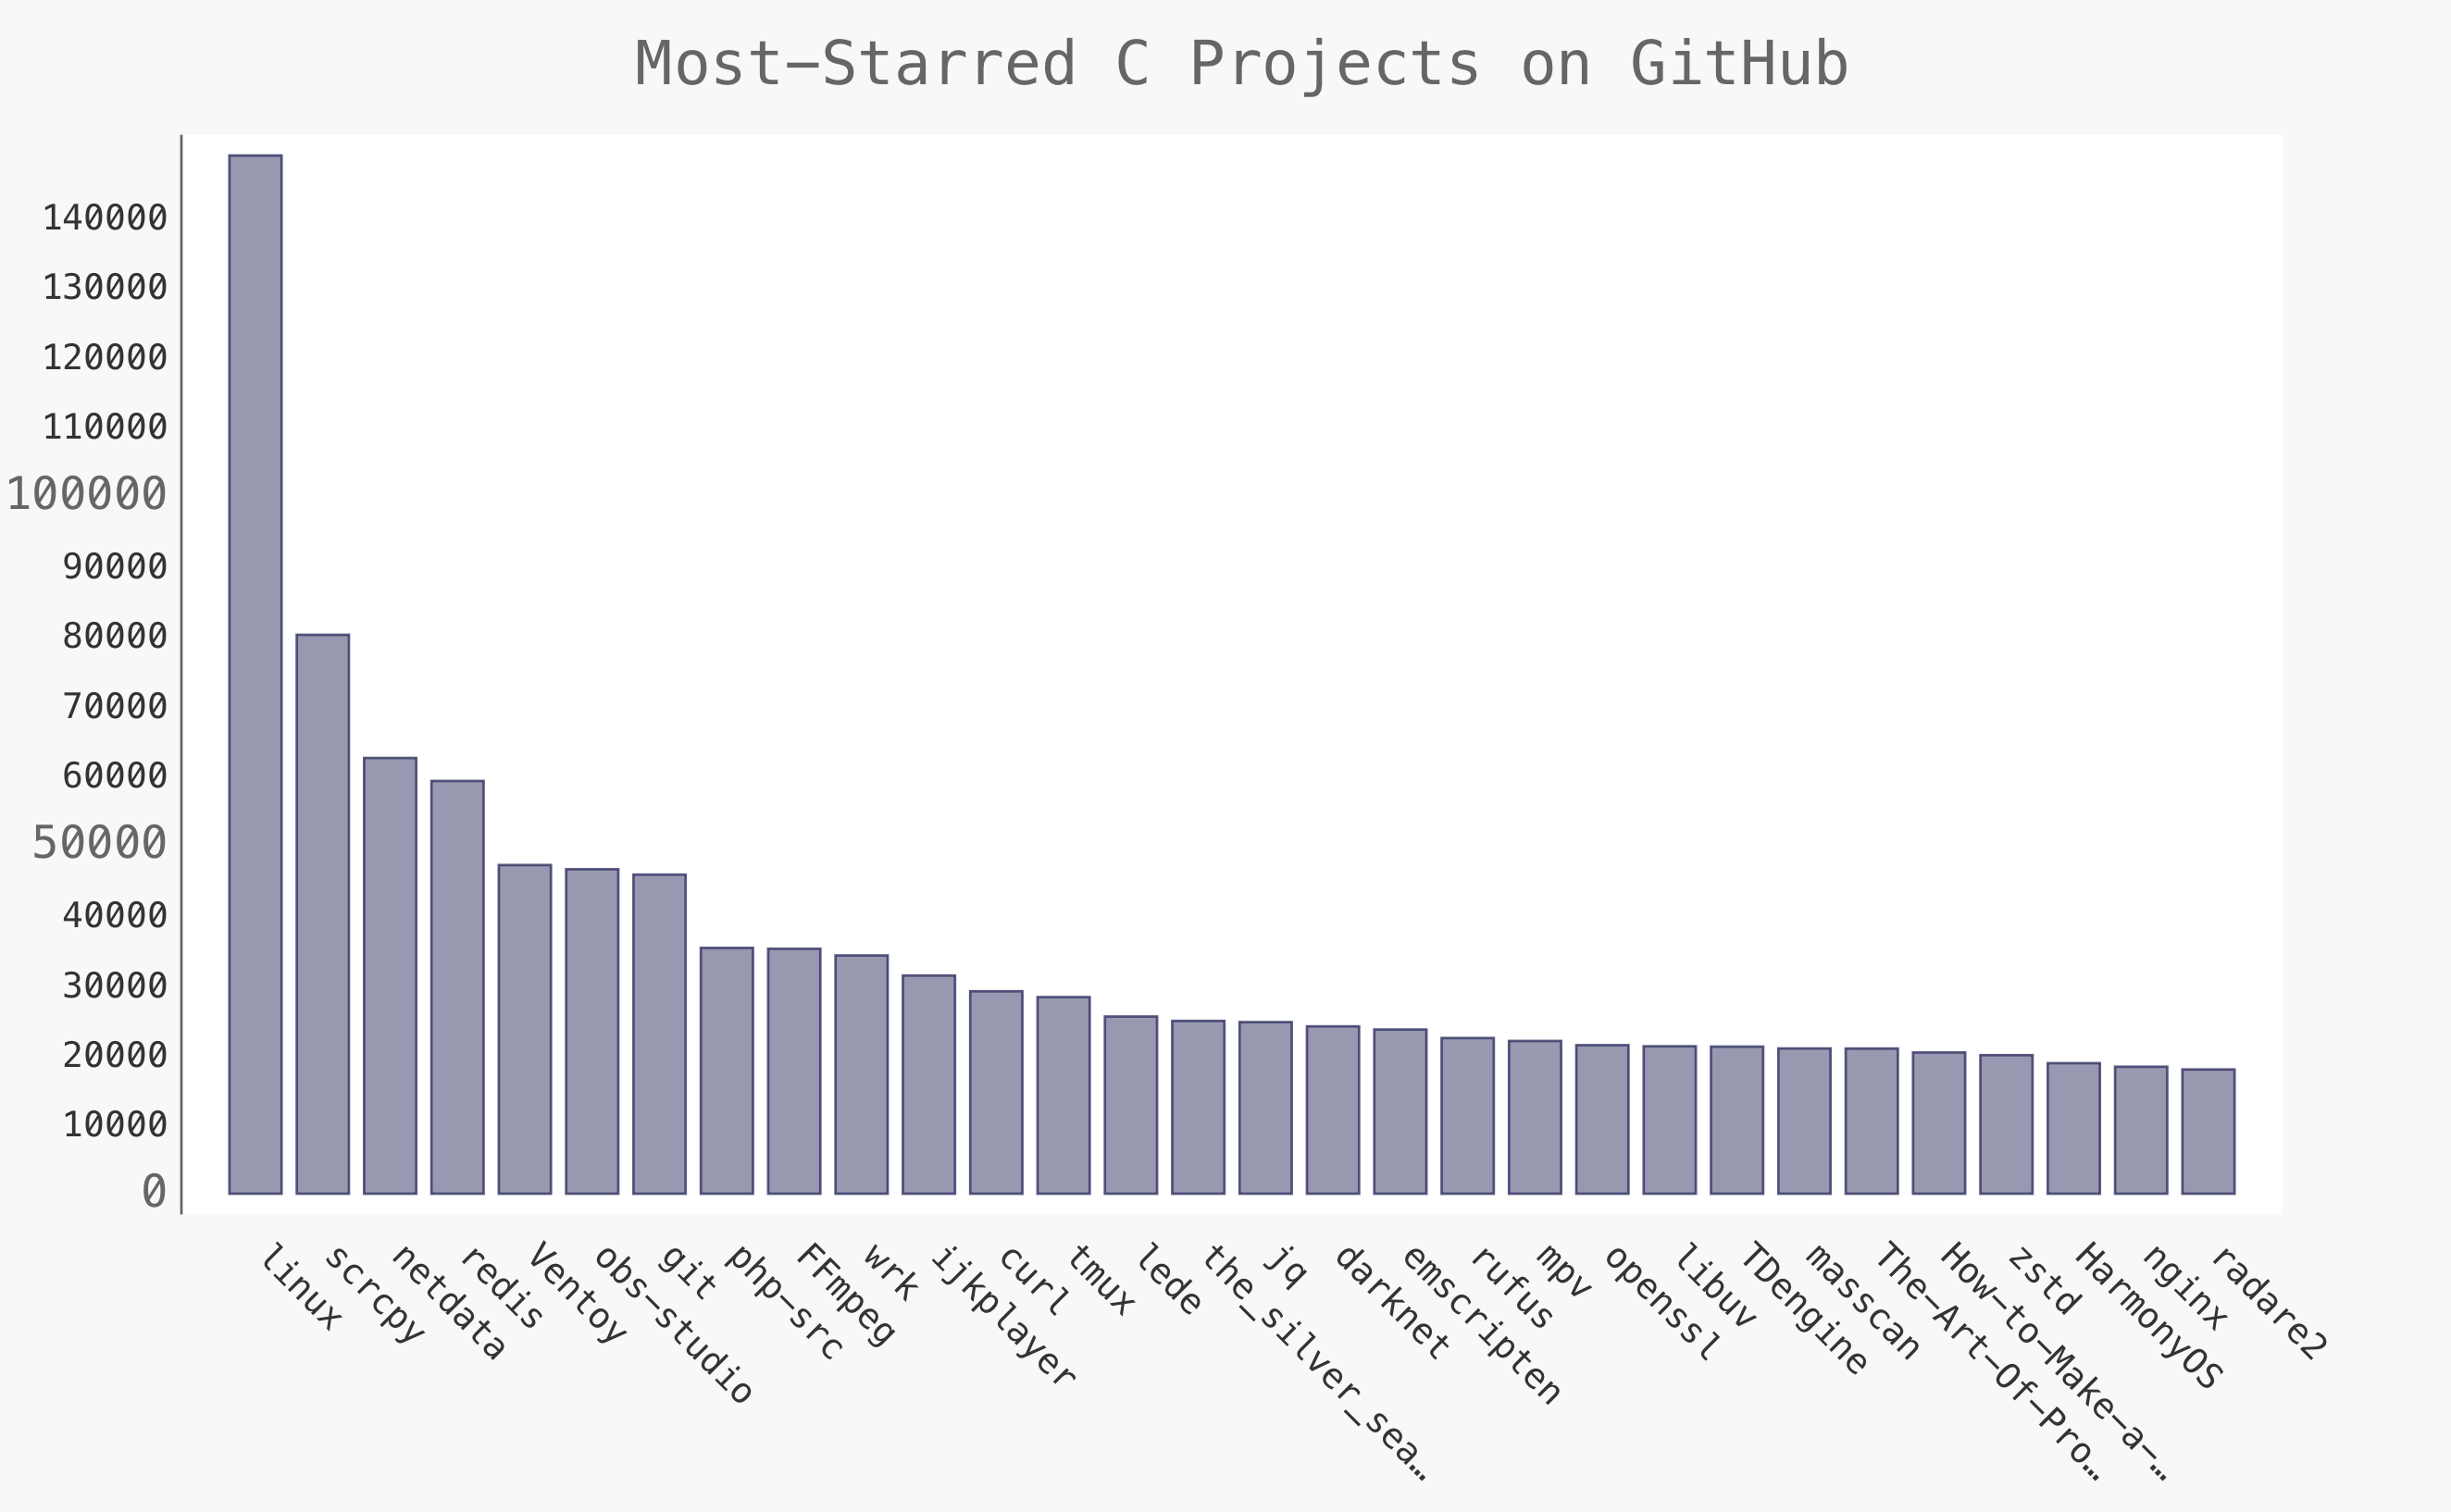

# Using API to plot the most commented news article on Hackernews.

In [ ]:
import requests
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
from operator import itemgetter

# Make an API call, and store the response.                                                                                                                                                                 
url = 'https://hacker-news.firebaseio.com/v0/topstories.json'
r = requests.get(url)
print("Status code:", r.status_code)

# Process information about each submission.                                                                                                                                                                
submission_ids = r.json()
submission_dicts = []
names = []
for submission_id in submission_ids[:30]:
    # Make a separate API call for each submission.                                                                                                                                                         
    url = ('https://hacker-news.firebaseio.com/v0/item/' +
            str(submission_id) + '.json')
    submission_r = requests.get(url)
    print(submission_r.status_code)
    response_dict = submission_r.json()
    names.append(response_dict['title'])
    submission_dict = {
        'title': response_dict['title'],
        'link': 'http://news.ycombinator.com/item?id=' + str(submission_id),
        'value': response_dict.get('descendants', 0)
        }
    submission_dicts.append(submission_dict)

submission_dicts = sorted(submission_dicts, key=itemgetter('value'),reverse=True)

# Make visualization.                                                                                                                                                                                       
my_style = LS('#333366', base_style=LCS)
my_style.title_font_size = 24
my_style.label_font_size = 14
my_style.major_label_font_size = 18

my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.truncate_label = 15
my_config.show_y_guides = False
my_config.width = 1000

chart = pygal.Bar(my_config, style=my_style)
chart.title = 'Most-Commented news on Hackerrank'
chart.x_labels = names

chart.add('', submission_dicts)
chart.render_to_file('hackerrank_comments.svg')

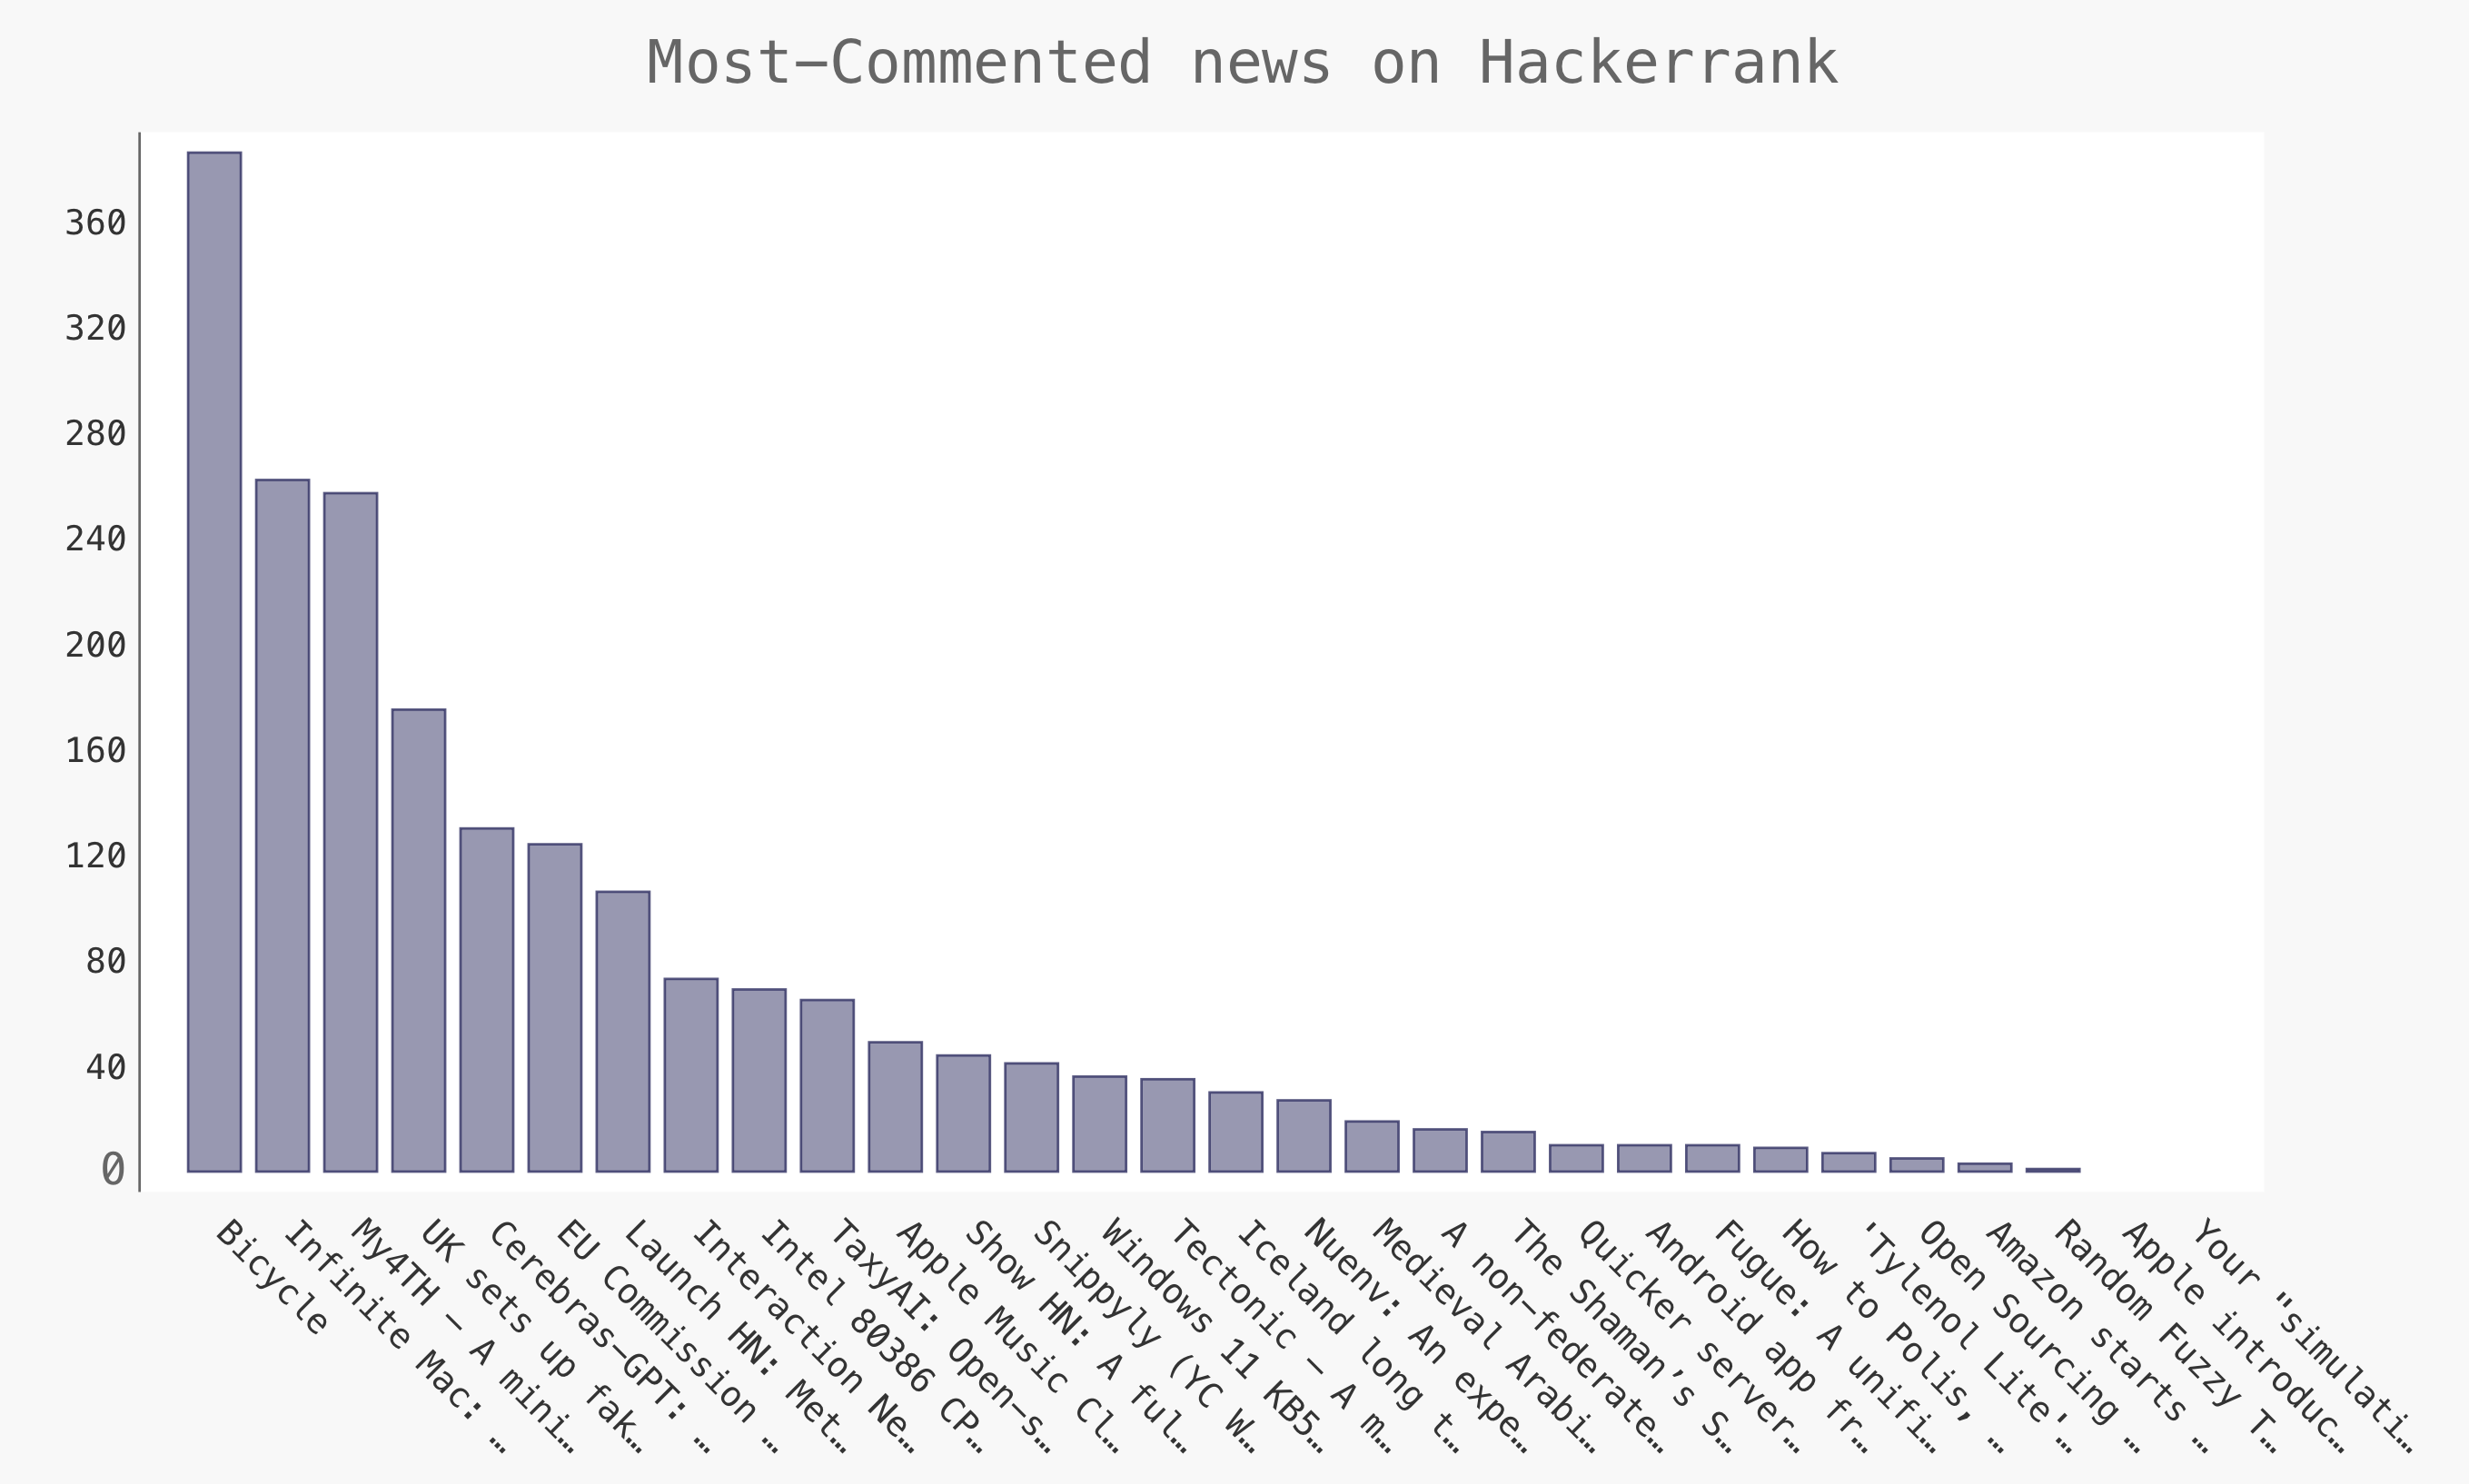